Combine all CSV records for both crude oil and gas oil and join them together. Remove duplicates, clean them and store them as CSVs again

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

This code combines the different CSV files into one big dataframe for both crude oil and gas oil

In [2]:
directory = r"../data/raw"

crude_files = []
gasoil_files = []

for name in os.listdir(directory):
    filepath = os.path.join(directory, name)

    if "BRN00" in name:
        print(filepath)
        df = pd.read_csv(filepath, thousands=',')
        crude_files.append(df)

    elif "GAS00" in name:
        print(filepath)
        df = pd.read_csv(filepath, thousands=',')
        gasoil_files.append(df)


../data/raw/FUTURE_UK_IFEU_BRN00 (11).csv
../data/raw/FUTURE_UK_IFEU_BRN00 (2).csv
../data/raw/FUTURE_UK_IFEU_GAS00 (10).csv
../data/raw/FUTURE_UK_IFEU_GAS00 (11).csv
../data/raw/FUTURE_UK_IFEU_BRN00 (3).csv
../data/raw/FUTURE_UK_IFEU_GAS00 (1).csv
../data/raw/FUTURE_UK_IFEU_BRN00 (10).csv
../data/raw/FUTURE_UK_IFEU_BRN00 (4).csv
../data/raw/FUTURE_UK_IFEU_GAS00 (16).csv
../data/raw/FUTURE_UK_IFEU_BRN00 (8).csv
../data/raw/FUTURE_UK_IFEU_GAS00 (6).csv
../data/raw/FUTURE_UK_IFEU_GAS00 (7).csv
../data/raw/FUTURE_UK_IFEU_BRN00 (16).csv
../data/raw/FUTURE_UK_IFEU_BRN00.csv
../data/raw/FUTURE_UK_IFEU_BRN00 (9).csv
../data/raw/FUTURE_UK_IFEU_GAS00.csv
../data/raw/FUTURE_UK_IFEU_BRN00 (5).csv
../data/raw/FUTURE_UK_IFEU_GAS00 (8).csv
../data/raw/FUTURE_UK_IFEU_GAS00 (14).csv
../data/raw/FUTURE_UK_IFEU_BRN00 (6).csv
../data/raw/FUTURE_UK_IFEU_GAS00 (4).csv
../data/raw/FUTURE_UK_IFEU_BRN00 (15).csv
../data/raw/FUTURE_UK_IFEU_BRN00 (14).csv
../data/raw/FUTURE_UK_IFEU_GAS00 (5).csv
../data/raw/FUT

Now with the singular CSVs, we will clean and process them before storing them safely as CSV files. Processing will include
- date column transformation
- date column sorting
- remove data points with no data
- plotting data

Crude Oil First

In [3]:
crude_df = pd.concat(crude_files, ignore_index=True)

In [4]:
crude_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4191 entries, 0 to 4190
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4191 non-null   object 
 1   Open    4191 non-null   float64
 2   High    4191 non-null   float64
 3   Low     4191 non-null   float64
 4   Close   4191 non-null   float64
dtypes: float64(4), object(1)
memory usage: 163.8+ KB


In [5]:
crude_df.head()

,Date,Open,High,Low,Close
0,09/09/2014,100.20,100.62,99.03,99.16
1,09/08/2014,100.80,101.00,99.36,100.20
2,09/05/2014,101.87,102.44,100.35,100.82
3,09/04/2014,102.41,102.95,101.70,101.83
4,09/03/2014,100.40,103.13,100.40,102.77


In [6]:
# Convert to datetime format
crude_df['Date'] = pd.to_datetime(crude_df['Date'])

In [7]:
# Sort dates chronologically
crude_df = crude_df.sort_values(by=['Date'], ignore_index=True)

In [8]:
# Drop none columns
crude_df = crude_df.dropna()

In [9]:
print(crude_df.head(10))
print(crude_df.tail(10))

        Date   Open   High    Low  Close
0 2009-05-08  56.64  58.50  56.64  58.14
1 2009-05-11  57.80  58.09  56.31  57.48
2 2009-05-12  57.30  58.91  56.87  57.94
3 2009-05-13  59.18  59.85  57.64  58.12
4 2009-05-14  58.16  58.92  56.73  58.59
5 2009-05-15  58.45  58.91  55.85  55.98
6 2009-05-18  56.17  58.86  55.91  58.47
7 2009-05-19  58.50  59.65  57.69  58.92
8 2009-05-20  58.90  60.80  58.76  60.59
9 2009-05-21  60.37  60.68  58.83  59.93
           Date   Open   High    Low  Close
4181 2025-08-26  68.14  68.16  66.60  66.70
4182 2025-08-27  66.85  67.51  66.37  67.44
4183 2025-08-28  67.15  68.06  66.81  67.98
4184 2025-08-29  67.59  67.94  67.29  67.48
4185 2025-09-01  67.42  68.36  67.12  68.15
4186 2025-09-02  68.19  69.53  68.05  69.14
4187 2025-09-03  69.10  69.24  67.36  67.60
4188 2025-09-04  67.41  67.41  66.35  66.99
4189 2025-09-05  66.82  67.05  65.07  65.50
4190 2025-09-08  65.89  67.04  65.51  66.02


Plot the data

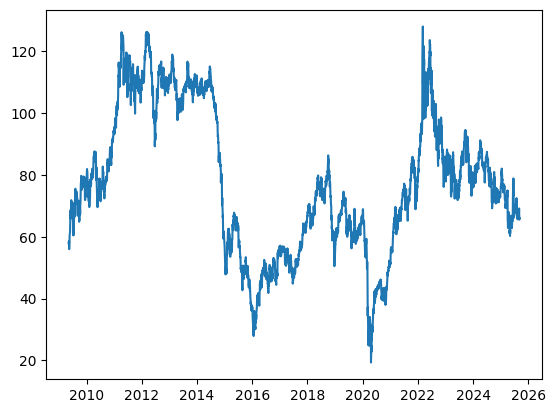

In [10]:
plt.plot(crude_df['Date'], crude_df['Close'])

Now Gas Oil

In [11]:
gasoil_df = pd.concat(gasoil_files, ignore_index=True)

In [12]:
gasoil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4191 entries, 0 to 4190
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4191 non-null   object 
 1   Open    4191 non-null   float64
 2   High    4191 non-null   float64
 3   Low     4191 non-null   float64
 4   Close   4191 non-null   float64
dtypes: float64(4), object(1)
memory usage: 163.8+ KB


In [13]:
gasoil_df.head()

,Date,Open,High,Low,Close
0,09/09/2015,486.75,489.50,469.00,477.00
1,09/08/2015,478.75,488.75,473.75,485.50
2,09/07/2015,486.00,486.00,472.25,474.50
3,09/04/2015,497.50,497.50,484.25,489.50
4,09/03/2015,486.25,502.00,481.00,495.25


In [14]:
gasoil_df['Date'] = pd.to_datetime(gasoil_df['Date'])

In [15]:
gasoil_df = gasoil_df.sort_values(by=['Date'], ignore_index=True)

In [16]:
gasoil_df = gasoil_df.dropna()

In [17]:
print(gasoil_df.head(10))
print(gasoil_df.tail(10))

        Date    Open    High     Low   Close
0 2009-05-08  481.50  491.75  480.75  482.00
1 2009-05-11  483.50  491.00  476.75  481.50
2 2009-05-12  480.50  495.75  480.00  483.25
3 2009-05-13  489.00  493.00  475.50  483.75
4 2009-05-14  476.75  483.00  469.00  472.75
5 2009-05-15  480.00  482.00  455.50  467.50
6 2009-05-18  457.50  477.00  457.00  466.25
7 2009-05-19  473.00  482.00  466.00  469.75
8 2009-05-20  477.50  489.00  474.50  481.50
9 2009-05-21  483.50  487.75  473.00  476.75
           Date    Open    High     Low   Close
4181 2025-08-26  691.50  691.50  670.25  674.50
4182 2025-08-27  673.00  679.25  668.00  674.50
4183 2025-08-28  671.50  683.75  668.75  674.25
4184 2025-08-29  677.25  680.25  671.25  675.25
4185 2025-09-01  671.50  685.75  668.50  685.00
4186 2025-09-02  685.25  708.50  685.25  703.50
4187 2025-09-03  706.25  715.75  699.75  707.25
4188 2025-09-04  700.00  702.00  687.00  698.75
4189 2025-09-05  686.50  691.50  675.00  676.75
4190 2025-09-08  680.25  

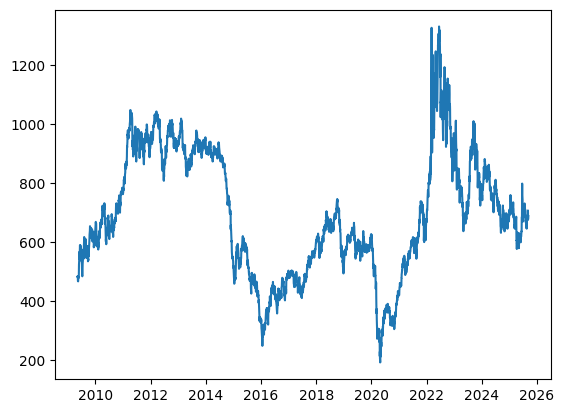

In [18]:
plt.plot(gasoil_df['Date'], gasoil_df['Close'])

Now save files

In [19]:
directory = r"../data/processed"
crude_df.to_csv(os.path.join(directory, "crude_futures.csv"))
gasoil_df.to_csv(os.path.join(directory, "gasoil_futures.csv"))